# Disney+

In [1]:
# Pandas, Numpy, Matplotlib, Seaborn을 호출
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

# disney2 변수를 만들고 credits.csv 파일의 데이터를 할당
disney2 = pd.read_csv('~/aiffel/disney+/credits.csv')

# disney2의 head 값 확인하기
disney2.head()

,person_id,id,name,character,role
0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR
1,5910,tm74391,Walt Disney,Mickey Mouse (segment 'The Sorcerer's Apprenti...,ACTOR
2,23436,tm74391,Julietta Novis,Soloist (segment 'Ave Maria') (singing voice),ACTOR
3,23434,tm74391,Leopold Stokowski,Himself - Conductor of The Philadelphia Orchestra,ACTOR
4,23441,tm74391,Paul Satterfield,NaN,DIRECTOR


In [2]:
# disney1 변수를 만들고 titles.csv 파일의 데이터를 할당
disney1 = pd.read_csv('~/aiffel/disney+/titles.csv')

# disney1의 head 값 확인하기
disney1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


In [3]:
# disney1의 정보 확인하기
disney1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1535 non-null   object 
 1   title                 1535 non-null   object 
 2   type                  1535 non-null   object 
 3   description           1529 non-null   object 
 4   release_year          1535 non-null   int64  
 5   age_certification     1210 non-null   object 
 6   runtime               1535 non-null   int64  
 7   genres                1535 non-null   object 
 8   production_countries  1535 non-null   object 
 9   seasons               415 non-null    float64
 10  imdb_id               1133 non-null   object 
 11  imdb_score            1108 non-null   float64
 12  imdb_votes            1105 non-null   float64
 13  tmdb_popularity       1524 non-null   float64
 14  tmdb_score            1426 non-null   float64
dtypes: float64(5), int64(

In [4]:
disney1.shape

(1535, 15)

In [5]:
# 결측치 확인
disney1.isnull().sum()

id                         0
title                      0
type                       0
description                6
release_year               0
age_certification        325
runtime                    0
genres                     0
production_countries       0
seasons                 1120
imdb_id                  402
imdb_score               427
imdb_votes               430
tmdb_popularity           11
tmdb_score               109
dtype: int64

In [6]:
# 중복된 데이터 확인
disney1.duplicated().sum()

0

In [7]:
# description 결측치 있는 행 제거
disney = disney1.dropna(subset=['description']).reset_index(drop=True)
print(disney.shape)
disney.isnull().sum()

(1529, 15)


id                         0
title                      0
type                       0
description                0
release_year               0
age_certification        320
runtime                    0
genres                     0
production_countries       0
seasons                 1118
imdb_id                  400
imdb_score               424
imdb_votes               427
tmdb_popularity            6
tmdb_score               103
dtype: int64

In [8]:
# 각 컬럼 간 상관관계
disney1.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,0.035408,-0.323331,0.020416,-0.008797,0.063519,0.219422
runtime,0.035408,1.000000,0.053115,-0.052458,0.431629,0.071872,-0.189938
seasons,-0.323331,0.053115,1.000000,0.109505,0.220509,0.005160,-0.053576
imdb_score,0.020416,-0.052458,0.109505,1.000000,0.293552,0.067618,0.555856
imdb_votes,-0.008797,0.431629,0.220509,0.293552,1.000000,0.149533,0.124163
tmdb_popularity,0.063519,0.071872,0.005160,0.067618,0.149533,1.000000,0.081074
tmdb_score,0.219422,-0.189938,-0.053576,0.555856,0.124163,0.081074,1.000000


#### 상관관계 분석
relaese_year : tmdb_score  
runtime : imdb_votes  
seasons : imdb  
imdb_score : imdb_votes, tmdb_score  
imdb_votes : relaese_year빼고

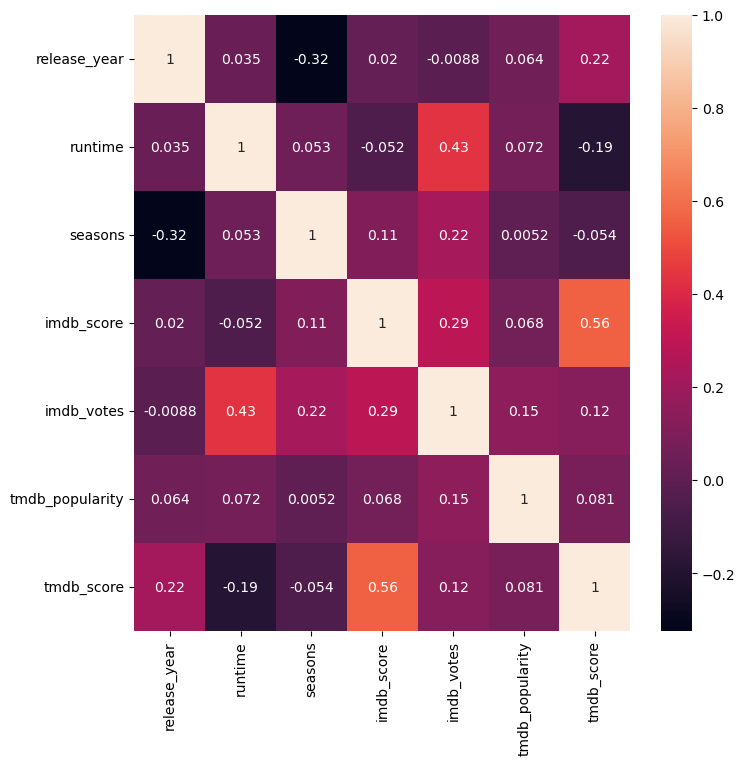

In [127]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
sns.heatmap(disney1.corr(), annot=True)
 
plt.show()

In [10]:
disney1['seasons'].unique()

array([nan,  5.,  7.,  3.,  1., 34., 32.,  4.,  6.,  2.,  8.,  9., 11.,
       20., 18., 10.])

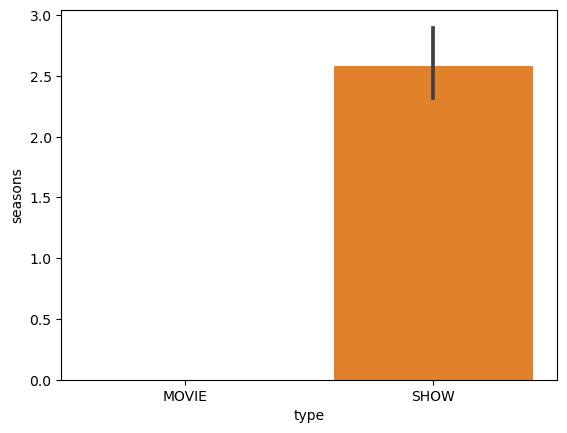

In [11]:
ax=sns.barplot(x='type', y='seasons', data=disney1)

In [12]:
# seasons 컬럼은 결측치를 0으로 변경
disney['seasons'] = disney['seasons'].fillna(0)
print(disney.shape)
disney['seasons'].isnull().sum()

(1529, 15)


0

In [13]:
# 컬럼 제거
disney_data = disney.drop(['age_certification', 'production_countries', 'runtime', 'imdb_id', 'description'], axis=1)
disney_data

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,1940,"['animation', 'family', 'music', 'fantasy']",0.0,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,1937,"['fantasy', 'family', 'romance', 'animation', ...",0.0,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,1940,"['animation', 'comedy', 'family', 'fantasy']",0.0,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,1942,"['animation', 'drama', 'family']",0.0,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,1950,"['family', 'action']",0.0,6.9,8229.0,10.698,6.5
...,...,...,...,...,...,...,...,...,...,...
1524,tm1071287,Killer Shark vs. Killer Whale,MOVIE,2021,['documentation'],0.0,6.4,17.0,1.061,4.0
1525,tm1091101,Far From Raven's Home,MOVIE,2021,"['animation', 'comedy']",0.0,5.6,8.0,0.744,10.0
1526,tm1075680,World's Most Dangerous Shark?,MOVIE,2021,['documentation'],0.0,NaN,NaN,1.400,NaN
1527,tm1133820,The Magic Maker,MOVIE,2021,[],0.0,4.2,9.0,1.504,NaN


In [14]:
# 컬럼별 결측치 총합
disney_data.isnull().sum()

id                   0
title                0
type                 0
release_year         0
genres               0
seasons              0
imdb_score         424
imdb_votes         427
tmdb_popularity      6
tmdb_score         103
dtype: int64

In [15]:
# imdb와 tmdb score가 둘 중 하나 NaN값인 경우 서로 채워주기
disney_data['imdb_score'] = disney_data['imdb_score'].fillna(disney_data['tmdb_score'])
disney_data[(disney_data['imdb_score'].isnull())]

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
186,tm895685,The Story of the Animated Drawing,MOVIE,1955,['documentation'],0.0,NaN,NaN,1.543,NaN
188,tm918170,The Pre-Opening Report from Disneyland,MOVIE,1955,"['family', 'documentation', 'history']",0.0,NaN,NaN,0.854,NaN
196,tm94576,Sultan And The Rock Star,MOVIE,1980,['drama'],0.0,NaN,NaN,1.516,NaN
803,tm895746,America's Greatest Animals,MOVIE,2012,['documentation'],0.0,NaN,NaN,3.534,NaN
902,tm940509,The Incredible Dr. Pol: Jingle Pols,MOVIE,2013,['documentation'],0.0,NaN,NaN,0.600,NaN
1003,ts123278,First Class Chefs,SHOW,2015,"['family', 'reality']",1.0,NaN,NaN,0.600,NaN
1004,ts269031,Party Animals,SHOW,2016,['documentation'],1.0,NaN,NaN,0.600,NaN
1005,ts80444,Nature Boom Time,SHOW,2016,[],1.0,NaN,NaN,2.405,NaN
1008,tm833134,World's Greatest Dogs,MOVIE,2015,[],0.0,NaN,NaN,0.885,NaN
1010,tm937148,The Incredible Dr. Pol Blue Ribbon Kids,MOVIE,2016,['documentation'],0.0,NaN,NaN,0.600,NaN


In [16]:
# imdb와 tmdb score가 둘 중 하나 NaN값인 경우 서로 채워주기
disney_data['tmdb_score'] = disney_data['tmdb_score'].fillna(disney_data['imdb_score'])
disney_data[(disney_data['tmdb_score'].isnull())]

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
186,tm895685,The Story of the Animated Drawing,MOVIE,1955,['documentation'],0.0,NaN,NaN,1.543,NaN
188,tm918170,The Pre-Opening Report from Disneyland,MOVIE,1955,"['family', 'documentation', 'history']",0.0,NaN,NaN,0.854,NaN
196,tm94576,Sultan And The Rock Star,MOVIE,1980,['drama'],0.0,NaN,NaN,1.516,NaN
803,tm895746,America's Greatest Animals,MOVIE,2012,['documentation'],0.0,NaN,NaN,3.534,NaN
902,tm940509,The Incredible Dr. Pol: Jingle Pols,MOVIE,2013,['documentation'],0.0,NaN,NaN,0.600,NaN
1003,ts123278,First Class Chefs,SHOW,2015,"['family', 'reality']",1.0,NaN,NaN,0.600,NaN
1004,ts269031,Party Animals,SHOW,2016,['documentation'],1.0,NaN,NaN,0.600,NaN
1005,ts80444,Nature Boom Time,SHOW,2016,[],1.0,NaN,NaN,2.405,NaN
1008,tm833134,World's Greatest Dogs,MOVIE,2015,[],0.0,NaN,NaN,0.885,NaN
1010,tm937148,The Incredible Dr. Pol Blue Ribbon Kids,MOVIE,2016,['documentation'],0.0,NaN,NaN,0.600,NaN


In [17]:
# 보간 후 컬럼별 결측치 총합
disney_data.isnull().sum()

id                   0
title                0
type                 0
release_year         0
genres               0
seasons              0
imdb_score          58
imdb_votes         427
tmdb_popularity      6
tmdb_score          58
dtype: int64

In [18]:
# 몇 가지 컨텐츠를 직접 imdb와 tmdb에 넣어본 결과 대체로 진짜 점수가 없는 경우가 대다수였다.
# 인기있는 컨텐츠를 뽑을 때 score들이 없는 컨텐츠는 그만큼 인기가 없는 것이라 판단하고 결측치 제거
disney_data = disney_data.dropna(subset=['imdb_score', 'tmdb_score']).reset_index(drop=True)
print(disney_data.shape)
disney_data.isnull().sum()

(1471, 10)


id                   0
title                0
type                 0
release_year         0
genres               0
seasons              0
imdb_score           0
imdb_votes         369
tmdb_popularity      6
tmdb_score           0
dtype: int64

In [19]:
disney_data

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,1940,"['animation', 'family', 'music', 'fantasy']",0.0,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,1937,"['fantasy', 'family', 'romance', 'animation', ...",0.0,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,1940,"['animation', 'comedy', 'family', 'fantasy']",0.0,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,1942,"['animation', 'drama', 'family']",0.0,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,1950,"['family', 'action']",0.0,6.9,8229.0,10.698,6.5
...,...,...,...,...,...,...,...,...,...,...
1466,tm999348,Own the Room,MOVIE,2021,['documentation'],0.0,6.5,223.0,3.544,6.4
1467,tm1002614,Built for Mars: The Perseverance Rover,MOVIE,2021,['documentation'],0.0,6.9,54.0,2.969,6.3
1468,tm1071287,Killer Shark vs. Killer Whale,MOVIE,2021,['documentation'],0.0,6.4,17.0,1.061,4.0
1469,tm1091101,Far From Raven's Home,MOVIE,2021,"['animation', 'comedy']",0.0,5.6,8.0,0.744,10.0


In [21]:
# imdb score 상위 10개
top_imdbscore=disney_data.sort_values('imdb_score',ascending=False)
top_imdbscore.head(10)

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
769,tm1104511,Return of the Clouded Leopards,MOVIE,2012,['documentation'],0.0,10.0,NaN,0.600,10.0
1259,ts269854,Disney Parks Sunrise Series,SHOW,2020,[],1.0,10.0,NaN,0.953,10.0
1268,ts251052,Disney Junior Music Lullabies,SHOW,2019,[],1.0,10.0,NaN,0.600,10.0
1278,ts255188,Calling All T.O.T.S.,SHOW,2020,[],2.0,10.0,NaN,5.175,10.0
1309,tm973637,From Our Family to Yours,MOVIE,2020,"['drama', 'animation']",0.0,10.0,NaN,1.400,10.0
1002,ts84270,Bluey,SHOW,2018,"['animation', 'family']",3.0,9.7,6626.0,32.210,7.0
1276,tm853361,Women of Impact: Changing the World,MOVIE,2020,['documentation'],0.0,9.5,NaN,3.319,9.5
1150,ts280148,The Wizard of Paws,SHOW,2020,"['family', 'reality']",2.0,9.4,30.0,1.519,9.4
814,ts301931,Cosmos: A Spacetime Odyssey,SHOW,2014,['documentation'],1.0,9.3,119455.0,NaN,9.3
1121,ts301932,Cosmos: Possible Worlds,SHOW,2020,"['documentation', 'drama', 'thriller', 'scifi']",1.0,9.1,5944.0,1.960,10.0


In [145]:
# 결측치 처리 전 imdb score 상위 10개
before_top_imdbscore=disney1.sort_values('imdb_score',ascending=False)
before_top_imdbscore.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1015,ts84270,Bluey,SHOW,Bluey is an inexhaustible six year-old Blue He...,2018,TV-Y,7,"['animation', 'family']",['AU'],3.0,tt7678620,9.7,6626.0,32.210,7.0
1182,ts280148,The Wizard of Paws,SHOW,Derrick Campana of Bionic Pets makes prostheti...,2020,NaN,22,"['family', 'reality']",['US'],2.0,tt13897634,9.4,30.0,1.519,NaN
819,ts301931,Cosmos: A Spacetime Odyssey,SHOW,An exploration of our discovery of the laws of...,2014,TV-PG,43,['documentation'],"['FR', 'PT']",1.0,tt2395695,9.3,119455.0,NaN,NaN
1151,ts301932,Cosmos: Possible Worlds,SHOW,"Following the wildly successful ""Cosmos: A Spa...",2020,TV-PG,43,"['documentation', 'drama', 'thriller', 'scifi']",['US'],1.0,tt11170862,9.1,5944.0,1.960,10.0
1252,ts238237,Alaska Animal Rescue,SHOW,"Dedicated first responders, veterinarians and ...",2020,NaN,44,"['reality', 'documentation']",['US'],2.0,tt12188528,9.0,36.0,1.790,10.0
1367,ts299852,The Beatles: Get Back,SHOW,Documentary about the music group The Beatles ...,2021,NaN,156,"['documentation', 'music']","['NZ', 'GB', 'US']",1.0,tt9735318,9.0,19391.0,13.597,8.5
1476,ts301923,The Hatcher Family Dairy,SHOW,The Hatcher family continues to operate a 175-...,2021,NaN,44,['documentation'],['US'],1.0,tt15058696,8.9,53.0,0.674,NaN
1468,tm1168196,ASSEMBLED: The Making of Hawkeye,MOVIE,"Join the likes of Jeremy Renner, Hailee Steinf...",2022,PG-13,59,['documentation'],['US'],NaN,tt14235904,8.8,NaN,16.685,6.4
1415,ts331520,Something Bit Me!,SHOW,The series explores the peculiar true stories ...,2022,TV-14,43,"['documentation', 'reality']",['US'],1.0,tt18334866,8.8,14.0,16.176,10.0
1184,ts225082,"Heartland Docs, DVM",SHOW,"In picturesque rural Nebraska, the husband and...",2020,TV-PG,44,['reality'],['US'],4.0,tt11783490,8.8,112.0,4.447,8.0


In [22]:
# imdb votes 상위 10개
top_imdbvotes=disney_data.sort_values('imdb_votes',ascending=False)
top_imdbvotes.head(10)

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
721,tm64957,The Avengers,MOVIE,2012,"['scifi', 'action']",0.0,8.0,1353907.0,262.184,7.7
85,tm1,Star Wars,MOVIE,1977,"['scifi', 'action', 'fantasy']",0.0,8.6,1321489.0,77.321,8.2
93,tm2,The Empire Strikes Back,MOVIE,1980,"['scifi', 'action', 'fantasy']",0.0,8.7,1248319.0,27.802,8.4
418,tm135853,Avatar,MOVIE,2009,"['fantasy', 'scifi', 'action']",0.0,7.8,1193331.0,598.284,7.5
813,tm140097,Guardians of the Galaxy,MOVIE,2014,"['action', 'comedy', 'scifi']",0.0,8.0,1125382.0,70.546,7.9
431,tm25151,WALL·E,MOVIE,2008,"['scifi', 'family', 'fantasy', 'romance', 'ani...",0.0,8.4,1083424.0,75.615,8.1
417,tm133512,Pirates of the Caribbean: The Curse of the Bla...,MOVIE,2003,"['fantasy', 'action']",0.0,8.0,1081867.0,484.892,7.8
429,tm51227,Iron Man,MOVIE,2008,"['action', 'scifi']",0.0,7.9,1026464.0,116.448,7.6
287,tm113629,The Lion King,MOVIE,1994,"['drama', 'family', 'animation']",0.0,8.5,1023813.0,145.278,8.3
216,tm3,Return of the Jedi,MOVIE,1983,"['action', 'scifi', 'fantasy']",0.0,8.3,1019886.0,26.537,7.9


In [70]:
# tmdb popularity 상위 10개
top_tmdbpopularity=disney_data.sort_values('tmdb_popularity',ascending=False)
top_tmdbpopularity.head(10)

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1313,ts219003,Moon Knight,SHOW,2022,"['action', 'scifi', 'drama', 'fantasy', 'horro...",1.0,7.5,128362.0,9323.832,8.5
1317,tm375923,Turning Red,MOVIE,2022,"['fantasy', 'comedy', 'family', 'animation']",0.0,7.0,90356.0,2331.811,7.4
901,tm123360,Doctor Strange,MOVIE,2016,"['fantasy', 'action', 'scifi']",0.0,7.5,697884.0,2286.312,7.4
1321,tm858873,Encanto,MOVIE,2021,"['fantasy', 'animation', 'comedy', 'family', '...",0.0,7.2,194310.0,1174.064,7.7
1352,tm989857,The Ice Age Adventures of Buck Wild,MOVIE,2022,"['comedy', 'drama', 'action', 'animation', 'fa...",0.0,4.5,11952.0,1026.354,6.9
1326,tm821207,Shang-Chi and the Legend of the Ten Rings,MOVIE,2021,"['fantasy', 'documentation', 'action', 'scifi'...",0.0,7.5,324679.0,818.481,7.7
1322,tm439804,Eternals,MOVIE,2021,"['scifi', 'action', 'fantasy', 'drama']",0.0,6.3,300591.0,656.899,7.1
425,tm31764,Pirates of the Caribbean: Dead Man's Chest,MOVIE,2006,"['fantasy', 'action']",0.0,7.3,697579.0,635.656,7.3
418,tm135853,Avatar,MOVIE,2009,"['fantasy', 'scifi', 'action']",0.0,7.8,1193331.0,598.284,7.5
437,tm84873,Pirates of the Caribbean: At World's End,MOVIE,2007,"['fantasy', 'action']",0.0,7.1,633813.0,570.745,7.2


In [71]:
# tmdb score 상위 10개
top_tmdbscore=disney_data.sort_values('tmdb_score',ascending=False)
top_tmdbscore.head(10)

,id,title,type,release_year,genres,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1218,ts238237,Alaska Animal Rescue,SHOW,2020,"['reality', 'documentation']",2.0,9.0,36.0,1.790,10.0
1409,ts258072,Mickey Mouse Funhouse,SHOW,2021,"['family', 'fantasy', 'romance', 'animation', ...",5.0,5.2,135.0,14.486,10.0
1369,ts272714,"Cesar Millan: Better Human, Better Dog",SHOW,2021,['reality'],1.0,8.2,110.0,1.400,10.0
1121,ts301932,Cosmos: Possible Worlds,SHOW,2020,"['documentation', 'drama', 'thriller', 'scifi']",1.0,9.1,5944.0,1.960,10.0
1363,ts331520,Something Bit Me!,SHOW,2022,"['documentation', 'reality']",1.0,8.8,14.0,16.176,10.0
1359,ts270701,Dino Ranch,SHOW,2021,"['action', 'family', 'western', 'animation', '...",1.0,6.2,106.0,3.809,10.0
1145,ts252988,Life Below Zero: Next Generation,SHOW,2020,['reality'],4.0,5.2,214.0,1.651,10.0
1173,ts223011,Buried Secrets of The Bible With Albert Lin,SHOW,2019,"['documentation', 'history']",1.0,6.8,188.0,2.024,10.0
1200,ts286382,Secrets of the Zoo: Tampa,SHOW,2020,"['documentation', 'family']",3.0,8.7,66.0,1.400,10.0
348,ts25438,Out of the Box,SHOW,1998,"['music', 'comedy', 'family', 'fantasy', 'spor...",3.0,7.4,990.0,2.063,10.0


In [148]:
# 결측치 처리 전 tmdb votes 상위 10개
before_top_tmdbscore=disney1.sort_values('tmdb_score',ascending=False)
before_top_tmdbscore.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1531,tm1091101,Far From Raven's Home,MOVIE,Our gang is off for an exotic vacation of a li...,2021,G,11,"['animation', 'comedy']",[],NaN,tt15489328,5.6,8.0,0.744,10.0
1307,ts251052,Disney Junior Music Lullabies,SHOW,"Mickey Mouse, Minnie Mouse, Doc McStuffins, Fa...",2019,TV-Y,1,[],['US'],1.0,NaN,NaN,NaN,0.600,10.0
1250,ts225533,Wild Cats of India,SHOW,India's wildcats have been symbols of strength...,2020,NaN,44,['documentation'],['IN'],1.0,tt11920706,7.6,44.0,1.400,10.0
1252,ts238237,Alaska Animal Rescue,SHOW,"Dedicated first responders, veterinarians and ...",2020,NaN,44,"['reality', 'documentation']",['US'],2.0,tt12188528,9.0,36.0,1.790,10.0
1278,ts94668,Prairie Dog Manor,SHOW,"""Prairie Dog Manor"" gives an in depth look at ...",2019,NaN,22,"['reality', 'documentation']",['US'],1.0,tt8316986,8.0,48.0,1.494,10.0
1284,ts112728,The Rocketeer,SHOW,"A girl inherits the persona of The Rocketeer, ...",2019,TV-Y,23,"['scifi', 'animation', 'action', 'comedy', 'fa...",['US'],1.0,tt8068852,4.9,171.0,11.641,10.0
1421,ts272714,"Cesar Millan: Better Human, Better Dog",SHOW,Showcases Cesar Millan as he takes on the most...,2021,TV-14,42,['reality'],['US'],1.0,tt15083978,8.2,110.0,1.400,10.0
1296,ts269854,Disney Parks Sunrise Series,SHOW,"At daybreak, the first rays of sunlight gleam ...",2020,TV-G,59,[],['US'],1.0,NaN,NaN,NaN,0.953,10.0
1320,ts255188,Calling All T.O.T.S.,SHOW,"T.O.T.S. Junior Fliers, Pip and Freddy love no...",2020,TV-G,2,[],['PH'],2.0,NaN,NaN,NaN,5.175,10.0
1233,ts286382,Secrets of the Zoo: Tampa,SHOW,Embrace the wild side of the Sunshine State wi...,2020,TV-14,44,"['documentation', 'family']",['US'],3.0,tt11708046,8.7,66.0,1.400,10.0


<Figure size 2000x800 with 0 Axes>

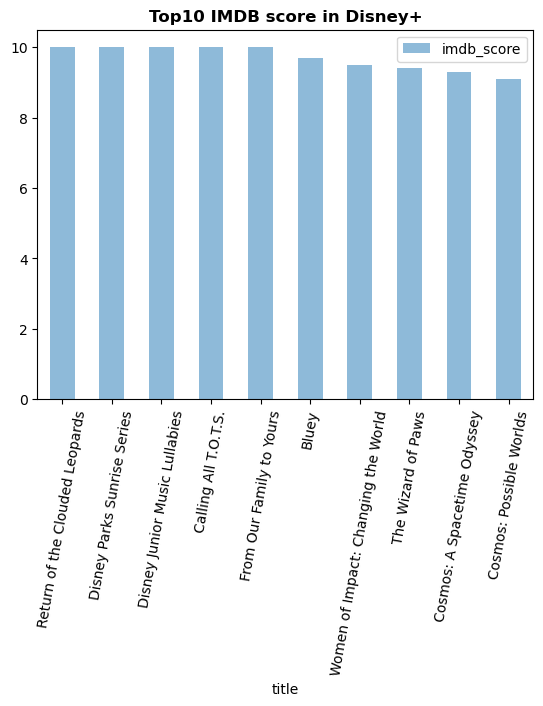

In [143]:
# imdb scores top 10
plt.figure(figsize=(20,8))
top_imdbscore.head(10).plot.bar(x='title', y='imdb_score', alpha=0.5)
plt.xticks(rotation=80)
plt.title("Top10 IMDB score in Disney+",fontweight="bold")
plt.show()

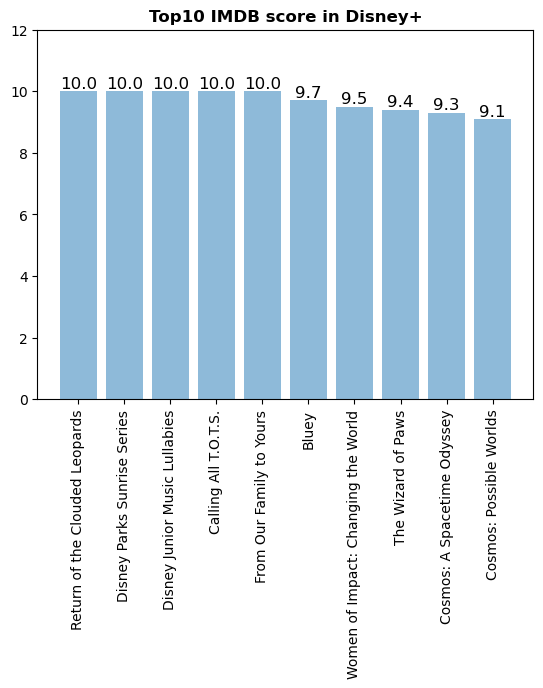

In [142]:
# imdb scores top 10(수치 표시)
x = top_imdbscore.head(10)['title']
y = top_imdbscore.head(10)['imdb_score']
bar = plt.bar(x, y, alpha=0.5)
plt.ylim(0, 12)

# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.xticks(rotation=90)
plt.title("Top10 IMDB score in Disney+",fontweight="bold")

plt.show()

<Figure size 2000x800 with 0 Axes>

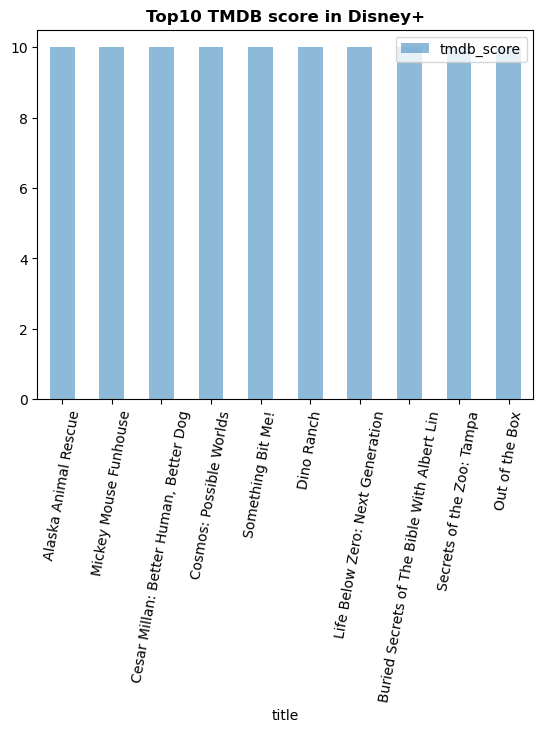

In [96]:
# tmdb scores top 10
plt.figure(figsize=(20,8))
top_tmdbscore.head(10).plot.bar(x='title', y='tmdb_score', alpha=0.5)
plt.xticks(rotation=80)
plt.title("Top10 TMDB score in Disney+",fontweight="bold")
plt.show()

<Figure size 2000x800 with 0 Axes>

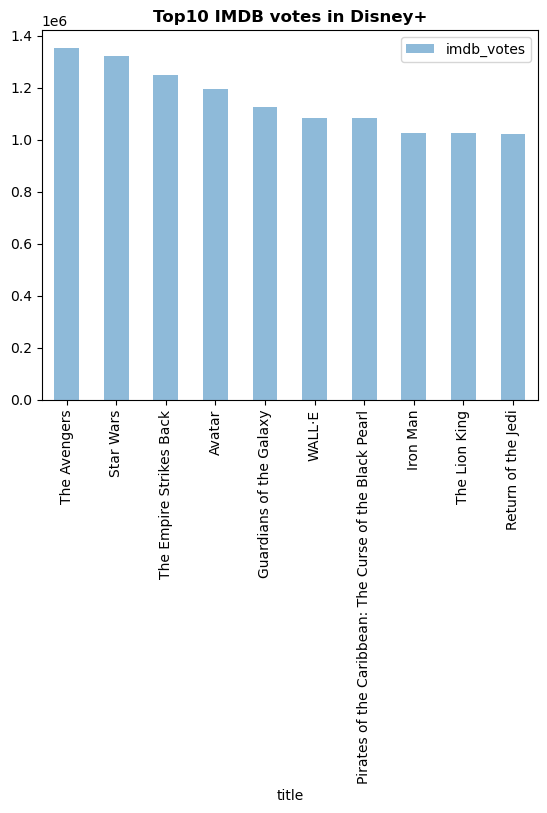

In [97]:
# imdb votes top 10
plt.figure(figsize=(20,8))
top_imdbvotes.head(10).plot.bar(x='title', y='imdb_votes', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Top10 IMDB votes in Disney+",fontweight="bold")
plt.show()

<Figure size 2000x1400 with 0 Axes>

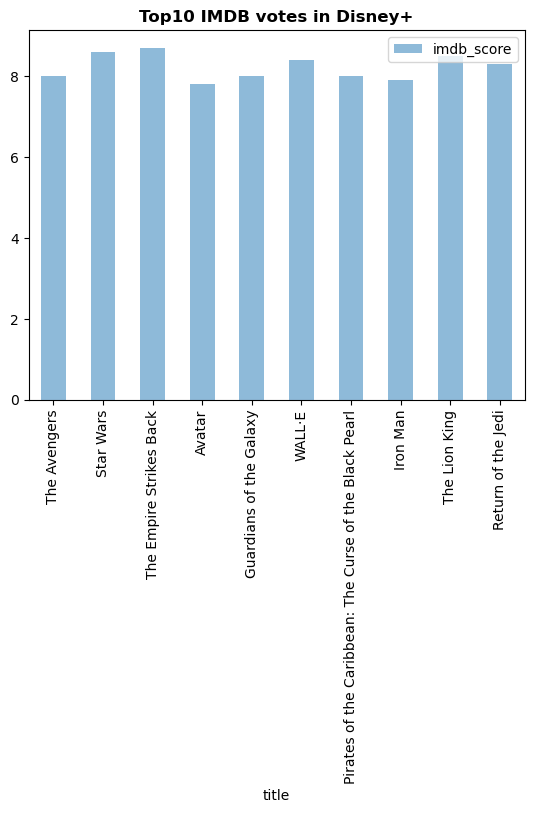

In [103]:
# imdb votes top 10 순위에 따른 imdb score
plt.figure(figsize=(20,14))
top_imdbvotes.head(10).plot.bar(x='title', y='imdb_score', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Top10 IMDB votes in Disney+",fontweight="bold")
plt.show()

<Figure size 2000x800 with 0 Axes>

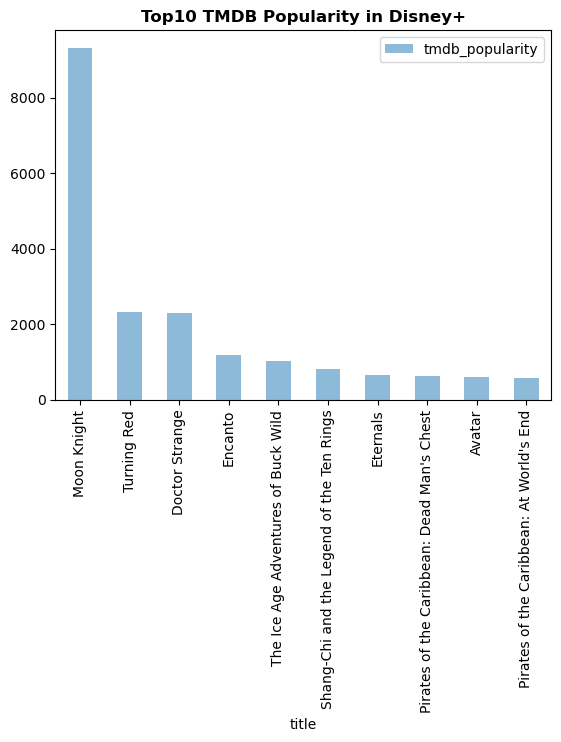

In [104]:
# tmdb popularity top 10
plt.figure(figsize=(20,8))
top_tmdbpopularity.head(10).plot.bar(x='title', y='tmdb_popularity', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Top10 TMDB Popularity in Disney+",fontweight="bold")
plt.show()

<Figure size 2000x800 with 0 Axes>

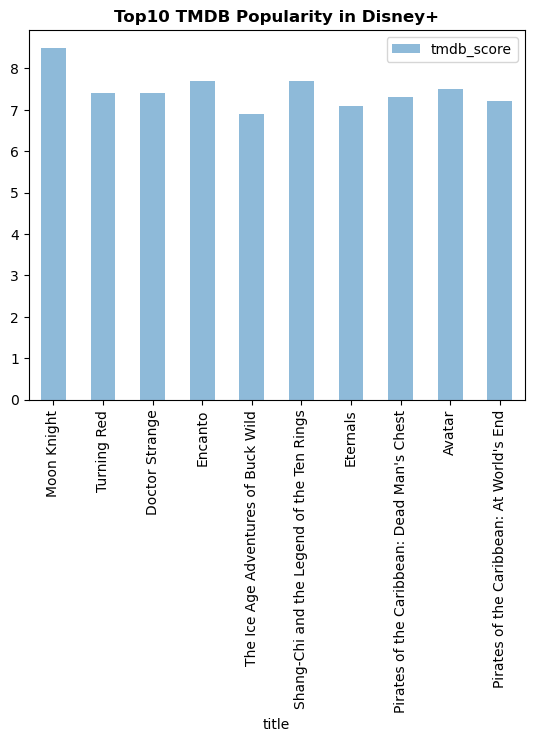

In [101]:
# tmdb popularity top 10 순위에 따른 tmdb score
plt.figure(figsize=(20,8))
top_tmdbpopularity.head(10).plot.bar(x='title', y='tmdb_score', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Top10 TMDB Popularity in Disney+",fontweight="bold")
plt.show()

--------

### 디즈니 영화와 쇼 비교

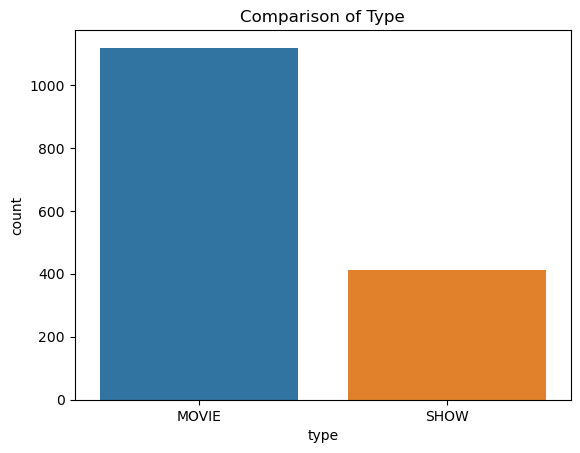

In [25]:
sns.countplot(x='type', data=disney)
plt.title("Comparison of Type")
plt.show()

### 디즈니 영화 연도별 분류

In [26]:
disney_movies= disney[disney["type"]== "MOVIE"]
disney_movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],0.0,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],0.0,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],0.0,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],0.0,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",0.0,tt0043067,6.9,8229.0,10.698,6.5


In [27]:
disney_movies["release_year"].value_counts()

2020    78
2021    76
2019    53
2014    38
2017    35
        ..
1928     1
1973     1
1970     1
1943     1
1958     1
Name: release_year, Length: 91, dtype: int64

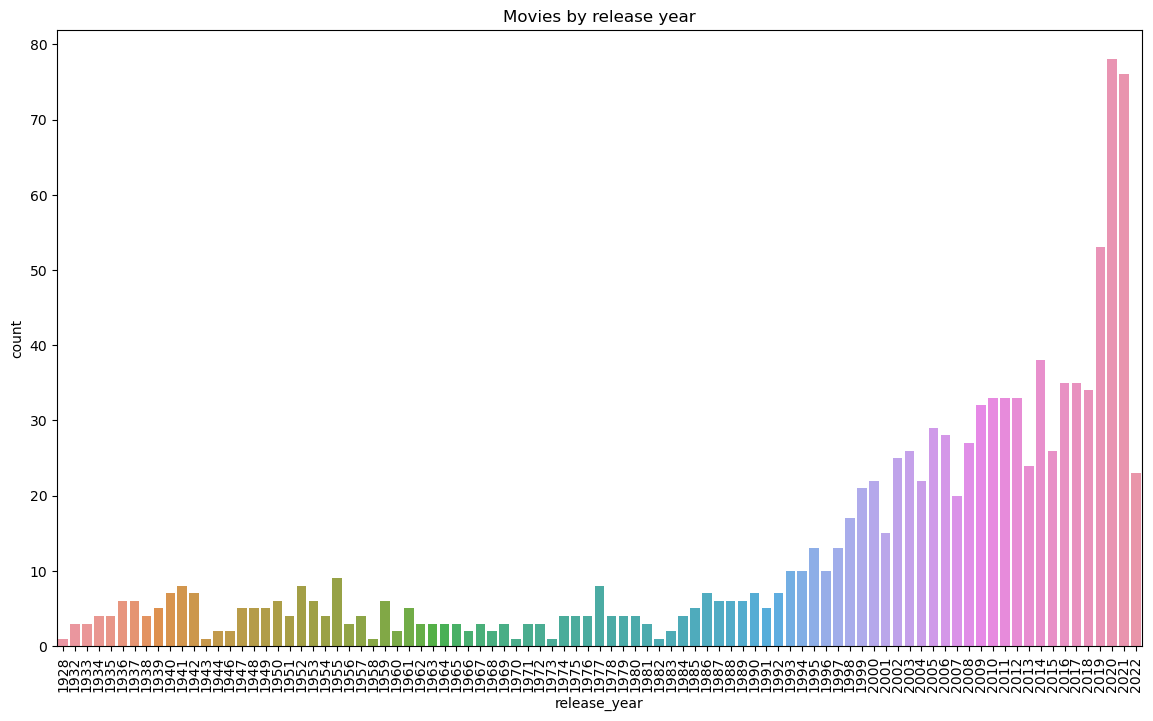

In [105]:
plt.figure(figsize=(14,8))
plt.xticks(rotation = 90)

sns.countplot(x='release_year', data=disney_movies)
plt.title("Movies by release year")
plt.show()

### 디즈니 쇼 연도별 분류

In [29]:
disney_show = disney[disney["type"]=="SHOW"]
disney_show

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
86,ts22470,The Muppet Show,SHOW,Go behind the curtains as Kermit the Frog and ...,1976,TV-G,25,"['comedy', 'family', 'music']",['GB'],5.0,tt0074028,8.4,24278.0,12.641,8.1
92,ts30718,Schoolhouse Rock!,SHOW,Schoolhouse Rock! is an American interstitial ...,1973,NaN,3,"['animation', 'family']",['US'],7.0,tt0069627,8.2,3905.0,2.987,7.8
109,ts28051,The Mickey Mouse Club,SHOW,A variety show featuring a cast of child perfo...,1955,TV-PG,31,"['family', 'music', 'comedy', 'drama']",['US'],3.0,tt0047757,7.6,779.0,7.194,5.8
120,ts24939,Spider-Woman,SHOW,When Jessica Drew was bitten by a poisonous sp...,1979,TV-PG,21,"['animation', 'fantasy', 'action', 'family']",['US'],1.0,tt0197911,5.8,790.0,19.081,8.0
140,ts27944,Spin and Marty,SHOW,Spin and Marty is a popular series of televisi...,1955,NaN,12,"['western', 'family']",['US'],1.0,tt0047775,8.0,300.0,2.866,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,ts273161,Foodtastic,SHOW,Three teams of food artists transform iconic c...,2021,TV-PG,42,['reality'],['US'],1.0,tt13644666,4.8,155.0,2.344,1.0
1510,ts272675,Breaking Bobby Bones,SHOW,Bobby Bones crisscrosses the country to meet e...,2021,TV-14,22,['documentation'],['US'],1.0,NaN,NaN,NaN,1.400,NaN
1516,ts271728,The Wild Life of Dr. Ole,SHOW,Dr. Ole Alcumbrac owns White Mountain Animal H...,2021,TV-PG,44,"['documentation', 'reality']",['US'],1.0,tt14232200,8.4,19.0,1.400,NaN
1518,ts288962,Turning the Tables with Robin Roberts,SHOW,Get personal with Robin Roberts and some of Ho...,2021,NaN,27,[],['US'],1.0,tt14598810,5.7,39.0,1.955,NaN


In [30]:
disney_show["release_year"].value_counts()

2021    59
2020    47
2019    42
2017    31
2018    26
2015    25
2016    22
2014    15
2012    15
2013    15
2022    12
2011    12
2010     8
2009     7
2008     5
2006     5
1998     4
2007     4
1992     4
1997     4
1994     4
2004     4
2001     3
2005     3
2003     3
1996     3
1999     3
2000     3
1991     3
1989     3
1985     3
1955     2
1993     2
1981     2
1973     1
1987     1
1979     1
1988     1
1990     1
2002     1
1995     1
1976     1
Name: release_year, dtype: int64

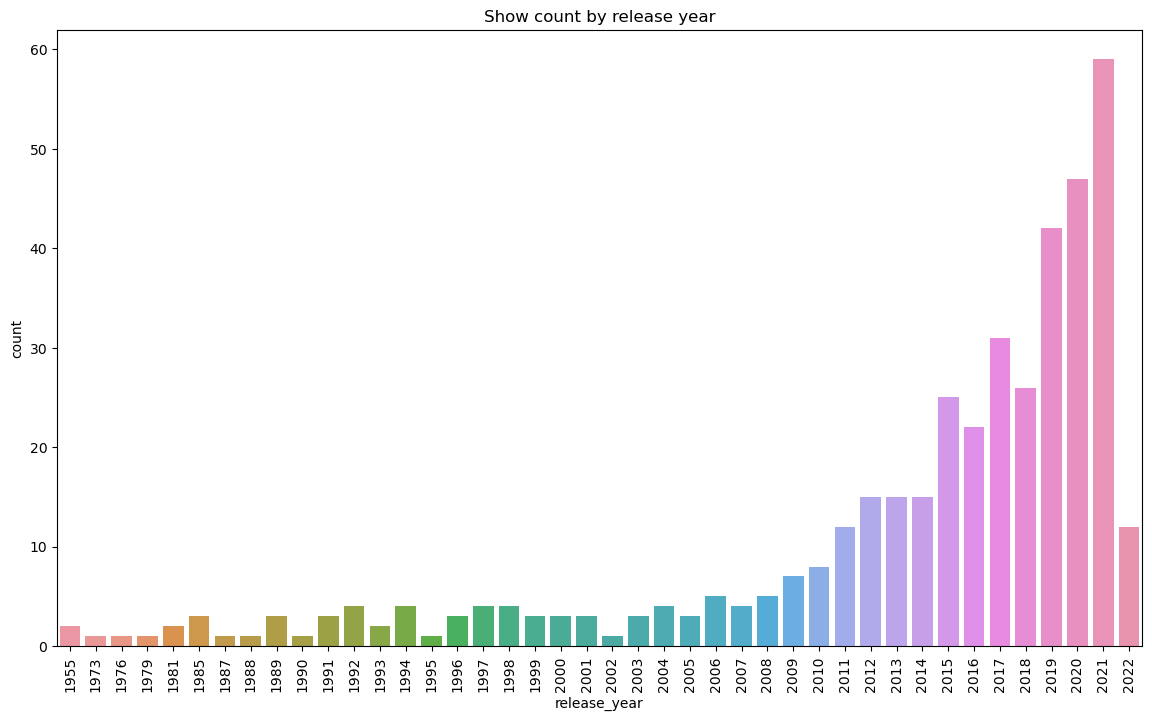

In [31]:
plt.figure(figsize=(14,8))
plt.xticks(rotation = 90)

sns.countplot(x='release_year', data=disney_show)
plt.title("Show count by release year")
plt.show()

### 장르별 분류

In [32]:
# 영화 장르 분류
disney_m_genres = disney_movies[['genres']]
disney_m_genres

,genres
0,"['animation', 'family', 'music', 'fantasy']"
1,"['fantasy', 'family', 'romance', 'animation', ..."
2,"['animation', 'comedy', 'family', 'fantasy']"
3,"['animation', 'drama', 'family']"
4,"['family', 'action']"
...,...
1524,['documentation']
1525,"['animation', 'comedy']"
1526,['documentation']
1527,[]


In [33]:
disney_m_genres["genres"].value_counts()

['documentation']                                         150
['animation']                                             112
['comedy']                                                 58
['fantasy']                                                20
['comedy', 'family']                                       18
                                                         ... 
['fantasy', 'scifi', 'action', 'family']                    1
['scifi', 'action', 'fantasy', 'european']                  1
['scifi', 'family', 'fantasy', 'romance', 'animation']      1
['fantasy', 'family', 'documentation']                      1
['documentation', 'animation']                              1
Name: genres, Length: 457, dtype: int64

In [34]:
# [] 장르가 비어있는 행 삭제
idx1 = disney_m_genres[disney_m_genres['genres'] == '[]'].index
disney_m_genres.drop(idx1, inplace=True)
disney_m_genres

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/3238323891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_m_genres.drop(idx1, inplace=True)


,genres
0,"['animation', 'family', 'music', 'fantasy']"
1,"['fantasy', 'family', 'romance', 'animation', ..."
2,"['animation', 'comedy', 'family', 'fantasy']"
3,"['animation', 'drama', 'family']"
4,"['family', 'action']"
...,...
1523,['documentation']
1524,['documentation']
1525,"['animation', 'comedy']"
1526,['documentation']


In [35]:
disney_m_genres["genres"] = disney_m_genres['genres'].str.replace(pat=r'[', repl=r'', regex=True)

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/2635446078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_m_genres["genres"] = disney_m_genres['genres'].str.replace(pat=r'[', repl=r'', regex=True)


In [36]:
disney_m_genres["genres"] = disney_m_genres['genres'].str.replace(pat=r']', repl=r'', regex=True)
disney_m_genres

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/3726940998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_m_genres["genres"] = disney_m_genres['genres'].str.replace(pat=r']', repl=r'', regex=True)


,genres
0,"'animation', 'family', 'music', 'fantasy'"
1,"'fantasy', 'family', 'romance', 'animation', '..."
2,"'animation', 'comedy', 'family', 'fantasy'"
3,"'animation', 'drama', 'family'"
4,"'family', 'action'"
...,...
1523,'documentation'
1524,'documentation'
1525,"'animation', 'comedy'"
1526,'documentation'


In [37]:
disney_m_genres['genres'] = disney_m_genres['genres'].apply(lambda x: x.split(",")[0])

print(disney_m_genres.shape)
disney_m_genres

(1108, 1)


/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/2474855801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_m_genres['genres'] = disney_m_genres['genres'].apply(lambda x: x.split(",")[0])


,genres
0,'animation'
1,'fantasy'
2,'animation'
3,'animation'
4,'family'
...,...
1523,'documentation'
1524,'documentation'
1525,'animation'
1526,'documentation'


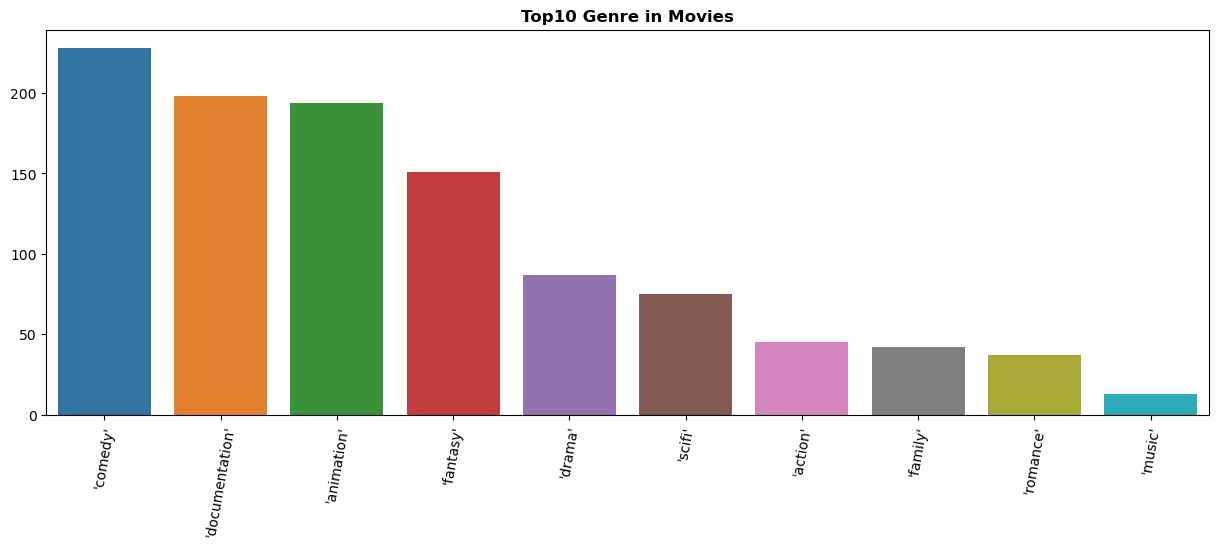

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x = disney_m_genres["genres"].value_counts().head(10).index,
            y = disney_m_genres["genres"].value_counts().head(10).values)
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()

In [39]:
# 쇼 장르 분류
disney_s_genres = disney_show[['genres']]
disney_s_genres

,genres
86,"['comedy', 'family', 'music']"
92,"['animation', 'family']"
109,"['family', 'music', 'comedy', 'drama']"
120,"['animation', 'fantasy', 'action', 'family']"
140,"['western', 'family']"
...,...
1503,['reality']
1510,['documentation']
1516,"['documentation', 'reality']"
1518,[]


In [40]:
disney_s_genres["genres"].value_counts()

['documentation']                                                    70
['reality']                                                          17
[]                                                                   17
['comedy', 'family']                                                 12
['documentation', 'reality']                                         12
                                                                     ..
['scifi', 'action', 'comedy', 'drama', 'family']                      1
['action', 'animation', 'family', 'fantasy']                          1
['comedy', 'drama', 'family', 'fantasy']                              1
['action', 'fantasy', 'scifi', 'animation', 'comedy', 'family']       1
['family', 'fantasy', 'romance', 'animation', 'comedy', 'action']     1
Name: genres, Length: 216, dtype: int64

In [41]:
idx3 = disney_s_genres[disney_s_genres['genres'] == '[]'].index
disney_s_genres.drop(idx3, inplace=True)
disney_s_genres

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/1233102764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_s_genres.drop(idx3, inplace=True)


,genres
86,"['comedy', 'family', 'music']"
92,"['animation', 'family']"
109,"['family', 'music', 'comedy', 'drama']"
120,"['animation', 'fantasy', 'action', 'family']"
140,"['western', 'family']"
...,...
1491,"['comedy', 'family', 'animation']"
1503,['reality']
1510,['documentation']
1516,"['documentation', 'reality']"


In [42]:
disney_s_genres["genres"] = disney_s_genres['genres'].str.replace(pat=r'[', repl=r'', regex=True)

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/3258505979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_s_genres["genres"] = disney_s_genres['genres'].str.replace(pat=r'[', repl=r'', regex=True)


In [43]:
disney_s_genres["genres"] = disney_s_genres['genres'].str.replace(pat=r']', repl=r'', regex=True)
disney_s_genres

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/907737074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_s_genres["genres"] = disney_s_genres['genres'].str.replace(pat=r']', repl=r'', regex=True)


,genres
86,"'comedy', 'family', 'music'"
92,"'animation', 'family'"
109,"'family', 'music', 'comedy', 'drama'"
120,"'animation', 'fantasy', 'action', 'family'"
140,"'western', 'family'"
...,...
1491,"'comedy', 'family', 'animation'"
1503,'reality'
1510,'documentation'
1516,"'documentation', 'reality'"


In [44]:
disney_s_genres['genres'] = disney_s_genres['genres'].apply(lambda x: x.split(",")[0])

print(disney_s_genres.shape)
disney_s_genres

(394, 1)


/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/589825839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_s_genres['genres'] = disney_s_genres['genres'].apply(lambda x: x.split(",")[0])


,genres
86,'comedy'
92,'animation'
109,'family'
120,'animation'
140,'western'
...,...
1491,'comedy'
1503,'reality'
1510,'documentation'
1516,'documentation'


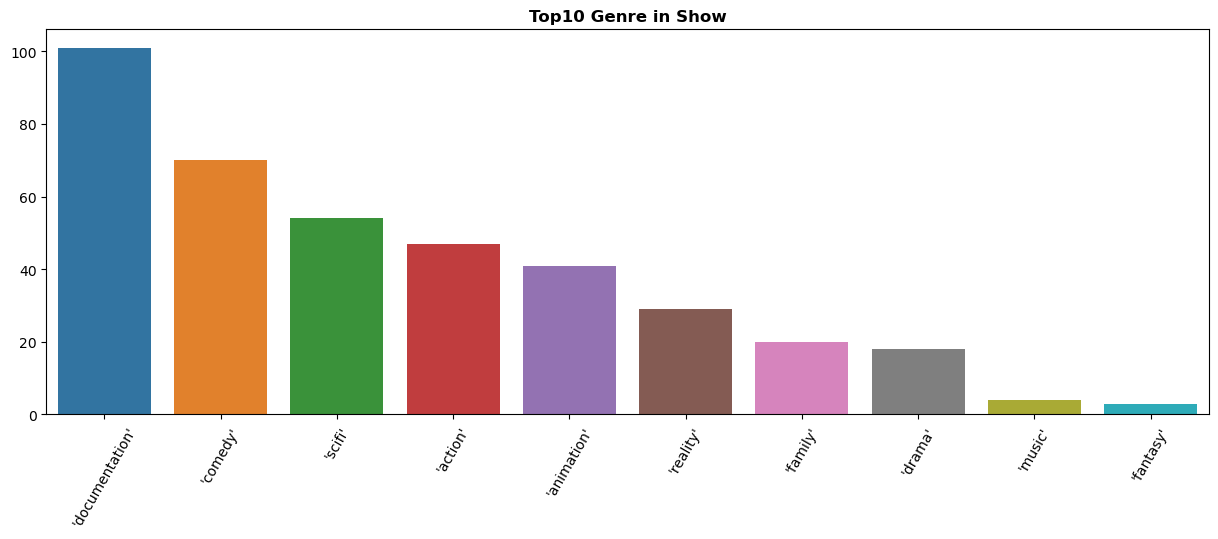

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(x = disney_s_genres["genres"].value_counts().head(10).index,
            y = disney_s_genres["genres"].value_counts().head(10).values)
plt.xticks(rotation=60)
plt.title("Top10 Genre in Show",fontweight="bold")
plt.show()

### 제작 국가별 분류

In [46]:
disney_p_country = disney[['production_countries']]
disney_p_country

,production_countries
0,['US']
1,['US']
2,['US']
3,['US']
4,"['GB', 'US']"
...,...
1524,['US']
1525,[]
1526,[]
1527,['US']


In [47]:
# [] 국가명이 비어있는 행 삭제
idx2 = disney_p_country[disney_p_country['production_countries'] == '[]'].index
disney_p_country.drop(idx2, inplace=True)
disney_p_country

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/3090316309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_p_country.drop(idx2, inplace=True)


,production_countries
0,['US']
1,['US']
2,['US']
3,['US']
4,"['GB', 'US']"
...,...
1522,['US']
1523,['US']
1524,['US']
1527,['US']


In [48]:
disney_p_country["production_countries"] = disney_p_country['production_countries'].str.replace(pat=r'[', repl=r'', regex=True)

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/1097084909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_p_country["production_countries"] = disney_p_country['production_countries'].str.replace(pat=r'[', repl=r'', regex=True)


In [49]:
disney_p_country["production_countries"] = disney_p_country['production_countries'].str.replace(pat=r']', repl=r'', regex=True)
disney_p_country

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/1664739518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_p_country["production_countries"] = disney_p_country['production_countries'].str.replace(pat=r']', repl=r'', regex=True)


,production_countries
0,'US'
1,'US'
2,'US'
3,'US'
4,"'GB', 'US'"
...,...
1522,'US'
1523,'US'
1524,'US'
1527,'US'


In [50]:
disney_p_country['production_countries'] = disney_p_country['production_countries'].apply(lambda x: x.split(",")[0])

disney_p_country

/var/folders/4q/5nms447x5r73lpjnv48256k80000gn/T/ipykernel_8594/3150082608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_p_country['production_countries'] = disney_p_country['production_countries'].apply(lambda x: x.split(",")[0])


,production_countries
0,'US'
1,'US'
2,'US'
3,'US'
4,'GB'
...,...
1522,'US'
1523,'US'
1524,'US'
1527,'US'


In [51]:
disney_p_country["production_countries"].value_counts()

'US'      1318
'GB'        49
'CA'        34
'FR'        18
'AU'        12
'DE'         8
'JP'         5
'NZ'         5
'IN'         4
'AR'         4
'CN'         3
'MX'         3
'ES'         2
'PH'         2
'ZA'         2
'DK'         1
'IT'         1
'BW'         1
'GR'         1
'CL'         1
'BR'         1
'HK'         1
'BE'         1
'NL'         1
'CI'         1
'XX'         1
'SG'         1
'PL'         1
'SUHH'       1
'SE'         1
'KR'         1
Name: production_countries, dtype: int64

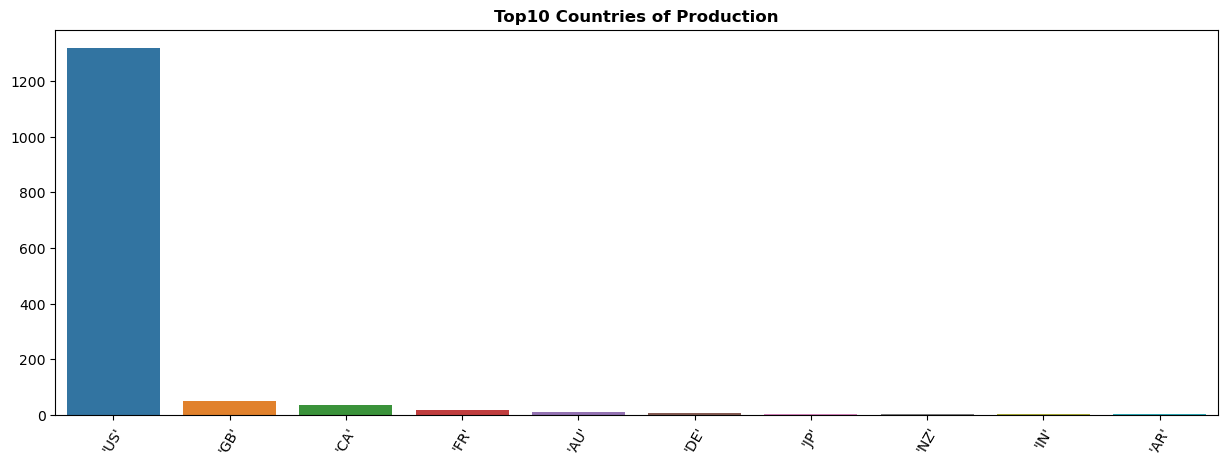

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(x = disney_p_country["production_countries"].value_counts().head(10).index,
            y = disney_p_country["production_countries"].value_counts().head(10).values)
plt.xticks(rotation=60)
plt.title("Top10 Countries of Production", fontweight="bold")
plt.show()

### 연령 제한에 따른 분류

In [53]:
disney_age = disney[['age_certification']]
disney_age

,age_certification
0,G
1,G
2,G
3,G
4,PG
...,...
1524,PG-13
1525,G
1526,PG-13
1527,PG


In [54]:
# age_certification 결측치 있는 행 제거
disney_age = disney_age.dropna(subset=['age_certification']).reset_index(drop=True)
print(disney_age.shape)
disney_age.isnull().sum()

(1209, 1)


age_certification    0
dtype: int64

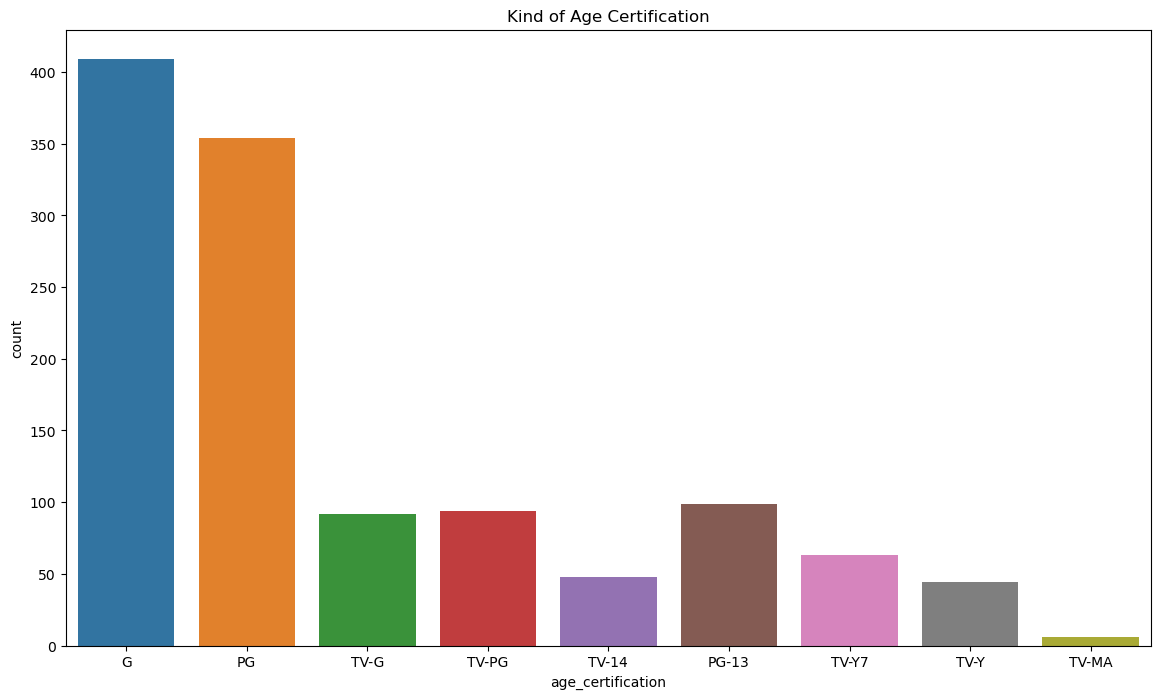

In [55]:
plt.figure(figsize=(14,8))

sns.countplot(x='age_certification', data=disney_age)
plt.title("Kind of Age Certification")
plt.show()

#### 영상물 등급 분류
1. 영화  
G : General (전체관람가)  
PG : 부모지도하 전체관람가  
PG-13 : 13세이상관람가(부모동반시 13세미만관람가능)  
R : 17세이상관람가(부모동반시 17세미만관람가능)  
NC-17 : 17세미만 관람불가  
2. 드라마  
TV-Y : 전체 어린이 대상  
TV-Y7 : 7세이상 어린이 대상  
TV-G : 전체관람가  
TV-PG : 부모지도하 전체관람가  
TV-14 : 14세미만 시청부적절  
TV-MA : 성인대상, 17세미만 시청부적절  

### runtime에 따른 분류_영화

## Reference
[히스토그램](https://wikidocs.net/92112)  
[데이터프레임 속 괄호 지우기](https://velog.io/@yelim421/.replace%EB%A1%9C-%EC%9B%90%ED%95%98%EB%8A%94-%ED%8A%B9%EC%88%98%EB%AC%B8%EC%9E%90%EC%99%80-%EA%B4%84%ED%98%B8-%EC%95%88%EC%9D%98-%EB%82%B4%EC%9A%A9-%EC%A7%80%EC%9A%B0%EA%B8%B0)  
[전반적인 참고1](https://sks8410.tistory.com/64)  
[전반적인 참고2](https://stricky.tistory.com/454)  
[결측치 채우기](https://zephyrus1111.tistory.com/130)  
[막대그래프](https://benn.tistory.com/11)  
[데이터프레임합성](https://datascienceschool.net/01%20python/04.06%20%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%20%ED%95%A9%EC%84%B1.html)  
[바그래프 수치표시](https://jimmy-ai.tistory.com/24)  